<a href="https://colab.research.google.com/github/Um333r/Decision-Trees-Company_Data/blob/master/Decision_Tree_resend_Company_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Trees Assignment**

**Data Set -** Company_Data

1. Import Necessary libraries


In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

2. Import Data


In [3]:
company_details = pd.read_csv('/content/Company_Data.csv')
company_details

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


3. Data Understanding

3.1 Initial Analysis :

In [4]:
company_details.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
company_details.shape


(400, 11)

In [6]:
company_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company_details.isna().sum()


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
company_details.describe()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
company_details.dtypes


Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [10]:
company_details.columns


Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [11]:
company_details.ShelveLoc.value_counts()


Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

3.2 Correlation Matrix :


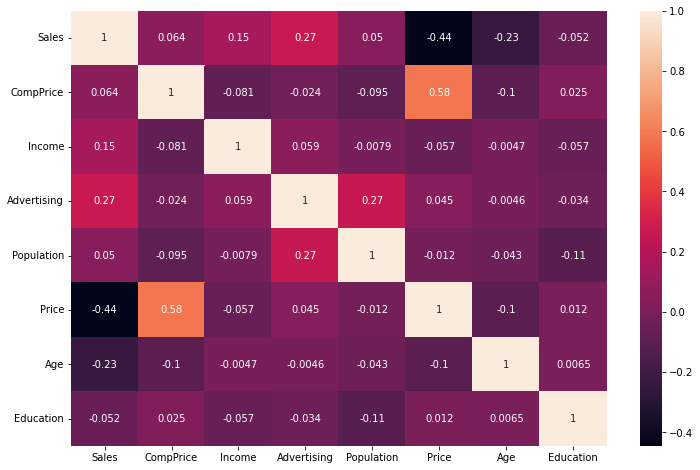

In [12]:
plt.figure(figsize = (12,8))
sns.heatmap(company_details.corr(),annot = True)
plt.show()

3.3 Label Encoder :

In [13]:
from sklearn import preprocessing


In [14]:
label_encoder = preprocessing.LabelEncoder()
label_encoder

LabelEncoder()

In [15]:
company_details['ShelveLoc'] = label_encoder.fit_transform(company_details['ShelveLoc'])
company_details['Urban'] = label_encoder.fit_transform(company_details['Urban'])
company_details['US'] = label_encoder.fit_transform(company_details['US'])

In [16]:
company_details


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [17]:
company_details['sales_label'] = pd.cut(x=company_details['Sales'], bins=[0, 5.5, 10.5, 16.5],
                     labels=['Low', 'Mid', 'High'])

In [18]:
 company_details

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_label
0,9.50,138,73,11,276,120,0,42,17,1,1,Mid
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,Mid
3,7.40,117,100,4,466,97,2,55,14,1,1,Mid
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Mid
397,7.41,162,26,12,368,159,2,40,18,1,1,Mid
398,5.94,100,79,7,284,95,0,50,12,1,1,Mid


In [19]:
company_details.sales_label.value_counts()

Mid     237
Low     102
High     60
Name: sales_label, dtype: int64

In [20]:
company_details_df = company_details.drop('Sales', axis=1)
company_details_df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_label
0,138,73,11,276,120,0,42,17,1,1,Mid
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,Mid
3,117,100,4,466,97,2,55,14,1,1,Mid
4,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,High
396,139,23,3,37,120,2,55,11,0,1,Mid
397,162,26,12,368,159,2,40,18,1,1,Mid
398,100,79,7,284,95,0,50,12,1,1,Mid


4. Train Test Split


In [21]:
from sklearn.model_selection import train_test_split


In [23]:
company_details_df.isna().sum()


CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales_label    1
dtype: int64

In [24]:
company_categorical=company_details_df.dropna()
company_categorical

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_label
0,138,73,11,276,120,0,42,17,1,1,Mid
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,Mid
3,117,100,4,466,97,2,55,14,1,1,Mid
4,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,High
396,139,23,3,37,120,2,55,11,0,1,Mid
397,162,26,12,368,159,2,40,18,1,1,Mid
398,100,79,7,284,95,0,50,12,1,1,Mid


In [25]:
x = company_categorical.drop('sales_label', axis=1)
y = company_categorical['sales_label']

In [26]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [27]:
y

0       Mid
1      High
2       Mid
3       Mid
4       Low
       ... 
395    High
396     Mid
397     Mid
398     Mid
399     Mid
Name: sales_label, Length: 399, dtype: category
Categories (3, object): ['Low' < 'Mid' < 'High']

In [28]:
company_categorical['sales_label'].unique()


['Mid', 'High', 'Low']
Categories (3, object): ['Low' < 'Mid' < 'High']

In [29]:
company_categorical.sales_label.value_counts()

Mid     237
Low     102
High     60
Name: sales_label, dtype: int64

In [30]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 40) 


5. Building Model for Decision Tree Classifier using Entropy Criteria

In [31]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [32]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

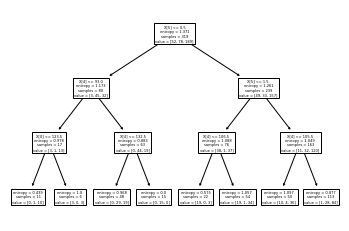

In [33]:
tree.plot_tree(model);  


In [34]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [35]:
f_n = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']
c_n = ['Low','Mid','High']


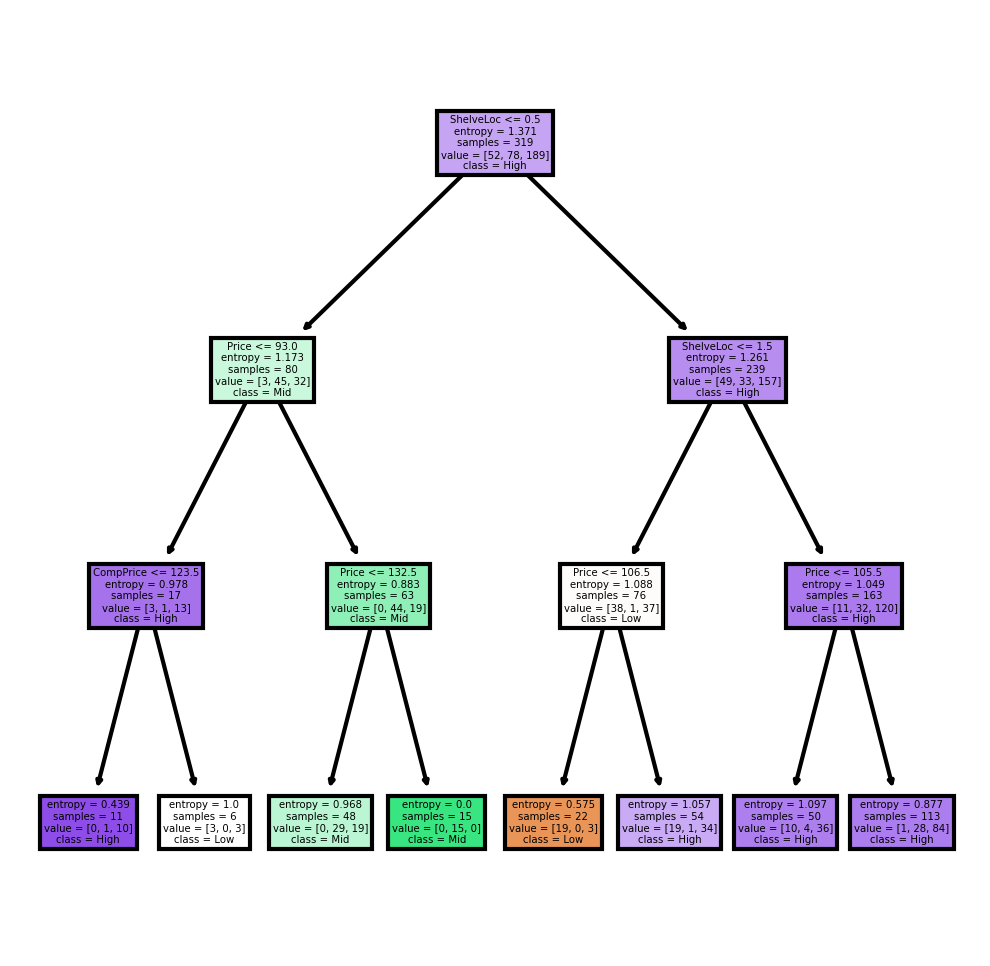

In [36]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi = 300)
tree.plot_tree(model,feature_names = f_n,class_names = c_n,filled = True);

5.1 Predicting on Test Data


In [37]:
pred = model.predict(x_test)                 
pd.Series(pred).value_counts() 

Mid     63
Low     14
High     3
dtype: int64

In [38]:
pred


array(['Mid', 'Mid', 'Mid', 'Low', 'Mid', 'High', 'Mid', 'Mid', 'Mid',
       'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Low',
       'Mid', 'High', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid',
       'Mid', 'Mid', 'Mid', 'Low', 'Low', 'Mid', 'Mid', 'Mid', 'Mid',
       'Mid', 'Low', 'Mid', 'Low', 'Mid', 'Low', 'Mid', 'Mid', 'Mid',
       'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid',
       'Low', 'Mid', 'Low', 'Low', 'Mid', 'Mid', 'High', 'Low', 'Low',
       'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Low', 'Mid', 'Mid', 'Low',
       'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid'],
      dtype=object)

In [39]:
pd.crosstab(y_test,pred)


col_0,High,Low,Mid
sales_label,,,
Low,0,8,16
Mid,0,6,42
High,3,0,5


In [40]:
np.mean(pred == y_test) 


0.6625

5.2 Feature Importance


In [41]:
model.feature_importances_ 


array([0.03705836, 0.        , 0.        , 0.        , 0.38831834,
       0.57462331, 0.        , 0.        , 0.        , 0.        ])

In [42]:
feature_imp = pd.Series(model.feature_importances_,index = f_n).sort_values(ascending = False) 
feature_imp

ShelveLoc      0.574623
Price          0.388318
CompPrice      0.037058
Income         0.000000
Advertising    0.000000
Population     0.000000
Age            0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

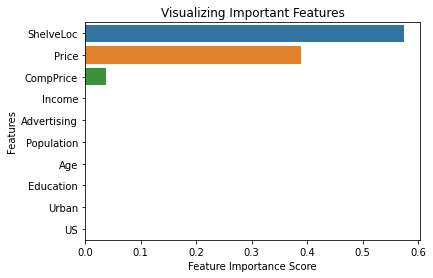

In [43]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

6. Building Model For Decision Tree Classifier (CART) using Gini Criteria

In [44]:
model_1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model_1.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

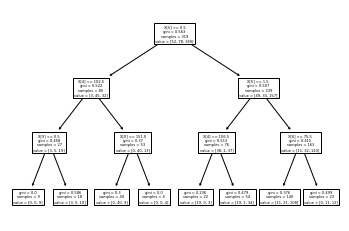

In [45]:
tree.plot_tree(model_1); 


In [46]:
f_n = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']
c_n = ['Low','Mid','High']

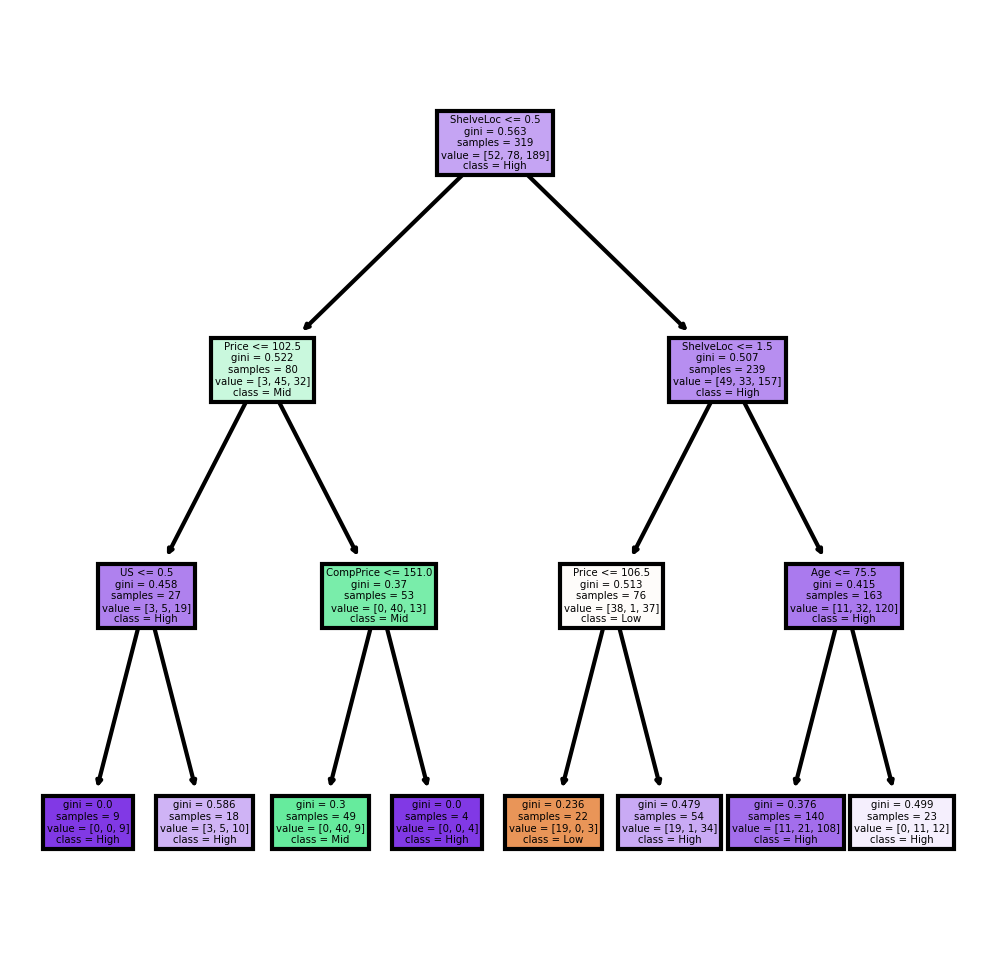

In [47]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi = 300)
tree.plot_tree(model_1,feature_names = f_n,class_names = c_n,filled = True);


6.1 Predicting on Test Data


In [48]:
pred_1 = model_1.predict(x_test)                 
pd.Series(pred_1).value_counts()  

Mid     66
Low     11
High     3
dtype: int64

In [49]:
pred_1


array(['Mid', 'Mid', 'Mid', 'Low', 'Mid', 'High', 'Mid', 'Mid', 'Mid',
       'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Low',
       'Mid', 'High', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid',
       'Mid', 'Mid', 'Mid', 'Low', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid',
       'Mid', 'Low', 'Mid', 'Mid', 'Mid', 'Low', 'Mid', 'Mid', 'Mid',
       'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid',
       'Low', 'Mid', 'Low', 'Low', 'Mid', 'Mid', 'High', 'Mid', 'Low',
       'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Low', 'Mid', 'Mid', 'Low',
       'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid'],
      dtype=object)

In [50]:
pd.crosstab(y_test,pred_1)


col_0,High,Low,Mid
sales_label,,,
Low,0,7,17
Mid,0,4,44
High,3,0,5


In [51]:
np.mean(pred_1 == y_test) 


0.675

Feature Importance


In [52]:
model_1.feature_importances_


array([0.08353338, 0.        , 0.        , 0.        , 0.29972727,
       0.52696459, 0.05901702, 0.        , 0.        , 0.03075774])

In [53]:
feature_imp_1 = pd.Series(model_1.feature_importances_,index = f_n).sort_values(ascending = False) 
feature_imp_1

ShelveLoc      0.526965
Price          0.299727
CompPrice      0.083533
Age            0.059017
US             0.030758
Income         0.000000
Advertising    0.000000
Population     0.000000
Education      0.000000
Urban          0.000000
dtype: float64

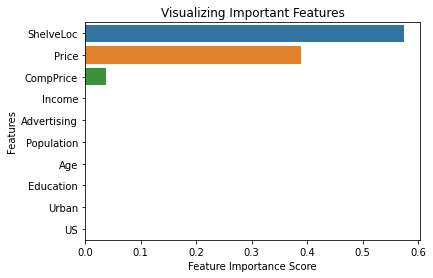

In [54]:
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

**7. Decision Tree Regression**


In [55]:
from sklearn.tree import DecisionTreeRegressor 


In [67]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
company_categorical['sales_label']= label_encoder.fit_transform(company_categorical['sales_label'])
  
company_categorical['sales_label'].unique()

array([2, 0, 1])

In [68]:
company_categorical

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_label
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,2
397,162,26,12,368,159,2,40,18,1,1,2
398,100,79,7,284,95,0,50,12,1,1,2


In [69]:
X = company_categorical.drop('sales_label', axis=1)
y = company_categorical['sales_label']

In [70]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1) 


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1) 


In [74]:
model_3 = DecisionTreeRegressor()
model_3.fit(X_train, y_train) 

DecisionTreeRegressor()

In [75]:
model_3.score(X_test,y_test) 


-0.5220408163265304

In [76]:
model_3.feature_importances_


array([0.08630807, 0.14094348, 0.13569697, 0.07815702, 0.20799595,
       0.18503107, 0.08150248, 0.08436495, 0.        , 0.        ])

In [77]:
feature_imp_3 = pd.Series(model_3.feature_importances_,index = f_n).sort_values(ascending = False) 
feature_imp_3

Price          0.207996
ShelveLoc      0.185031
Income         0.140943
Advertising    0.135697
CompPrice      0.086308
Education      0.084365
Age            0.081502
Population     0.078157
Urban          0.000000
US             0.000000
dtype: float64

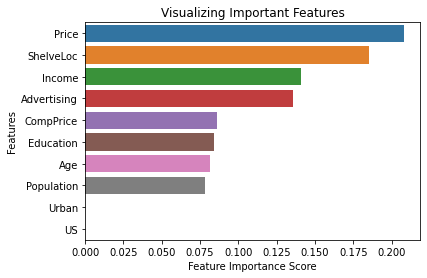

In [80]:
sns.barplot(x = feature_imp_3, y = feature_imp_3.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [82]:
X = company_categorical.drop(columns={'sales_label','Urban','US'})
y = company_categorical['sales_label']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1) 


In [84]:
model_3 = DecisionTreeRegressor()
model_3.fit(X_train, y_train) 

DecisionTreeRegressor()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,138,73,11,276,120,0,42,17
1,111,48,16,260,83,1,65,10
2,113,35,10,269,80,2,59,12
3,117,100,4,466,97,2,55,14
4,141,64,3,340,128,0,38,13
...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14
396,139,23,3,37,120,2,55,11
397,162,26,12,368,159,2,40,18
398,100,79,7,284,95,0,50,12


In [90]:
y_pred = model_3.predict(X_test)


In [91]:
from sklearn import metrics


print(f"Accuracy = {metrics.accuracy_score(y_test, y_pred)}")


Accuracy = 0.5606060606060606


Conclusion :

Model Accuracy for Entropy Criteria : 0.6625

Model Accuracy for Gini Criteria :0.675

Model Accuracy for Decision Tree Regression : 0.560